In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построить точечный график

2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

3. Построить модель линейной регрессии

4. Рассчитать коэффициент детерминации

5. Вывести график остатков

In [4]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [5]:
#удалим ненужную колонку
water.drop(columns='Unnamed: 0', axis=1, inplace=True) 

In [6]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


1. Построить точечный график

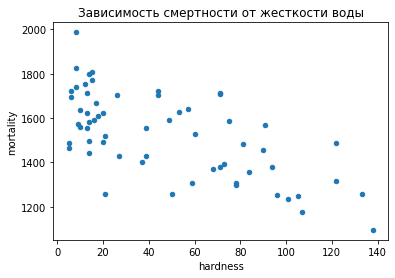

In [45]:
water.plot(kind='scatter', x='hardness', y='mortality', title='Зависимость смертности от жесткости воды')

наблюдается небольшая обратная зависимость смертности от жеcткости

2. Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [8]:
# считаем коэф. корреляции Пирсона
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [9]:
# считаем коэф. корреляции Спирмана
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


3. Построить модель линейной регрессии

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = water[['hardness']]
y = water['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_

array([-3.13167087])

In [15]:
model.intercept_

1668.9722977277095

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

4. Рассчитать коэффициент детерминации

In [17]:
model.score(X_test, y_test) 

0.5046490611017092

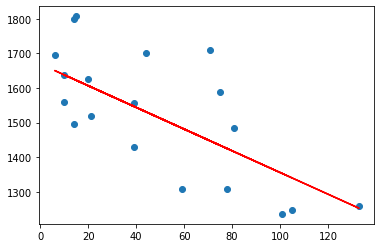

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Из графика видно, что наблюдается обратная линейная зависимость смертности от жесткости воды.


5. Вывести график остатков

Text(0.5, 1.0, 'График остатков')

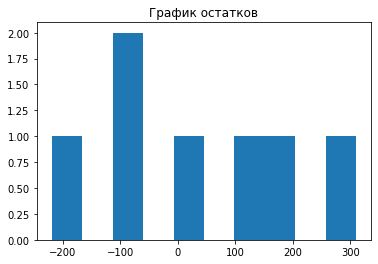

In [57]:
plt.hist(y_test - y_pred)
plt.title('График остатков')

Остатки распределены достаточно хаотично.

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [20]:
water_south = water[water['location'] == 'South']
water_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [21]:
water_north = water[water['location'] == 'North']
water_north.head() 

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


Посчитаем зависимость для Юга 

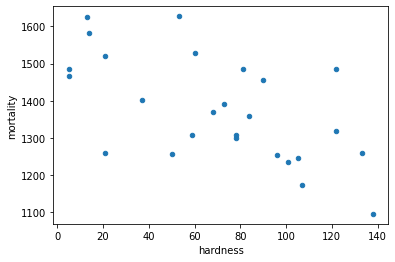

In [22]:
water_south.plot(kind='scatter', x='hardness', y='mortality')

По графику видно, что зависимость выражена не так отчетливо.

In [23]:
#считаем коэфф. Пирсона
water_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [24]:
#считаем коэфф. Спирмана 
water_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [25]:
X = water_south[['hardness']]
y = water_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([-3.07466127])

In [27]:
model.intercept_

1595.4337548999538

In [28]:
y_pred = model.predict(X_test)
y_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [29]:
model.score(X_test, y_test) 

-1.9300174406554644

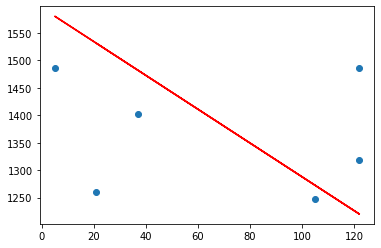

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

(array([1., 0., 2., 0., 1., 0., 1., 1., 0., 1.]),
 array([-219.39985704, -166.45009037, -113.5003237 ,  -60.55055703,
          -7.60079036,   45.34897631,   98.29874298,  151.24850965,
         204.19827632,  257.14804299,  310.09780966]),
 <a list of 10 Patch objects>)

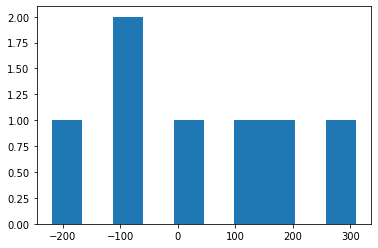

In [54]:
#Остатки
plt.hist(y_test - y_pred)

Посчитаем зависимость для Юга 

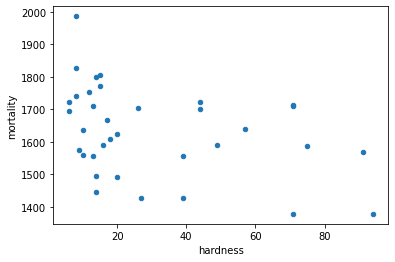

In [32]:
water_north.plot(kind='scatter', x='hardness', y='mortality')

Обратная зависимость сохраняется для Северных городов.

In [33]:
#считаем коэфф. Пирсона
water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [34]:
#считаем коэфф. Спирмана 
water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [35]:
X = water_north[['hardness']]
y = water_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.coef_

array([-2.25038888])

In [37]:
model.intercept_

1694.905301402942

In [38]:
y_pred = model.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [39]:
model.score(X_test, y_test) 

-0.18101539518829401

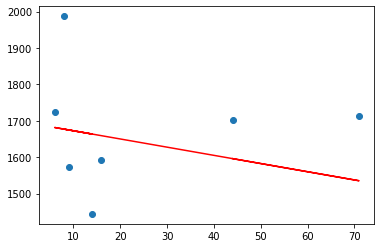

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

(array([1., 0., 2., 0., 1., 0., 1., 1., 0., 1.]),
 array([-219.39985704, -166.45009037, -113.5003237 ,  -60.55055703,
          -7.60079036,   45.34897631,   98.29874298,  151.24850965,
         204.19827632,  257.14804299,  310.09780966]),
 <a list of 10 Patch objects>)

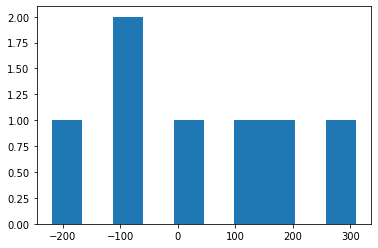

In [56]:
#остатки
plt.hist(y_test - y_pred)

Сравним графики зависимостей для всех городов, городов Юга и Севера.

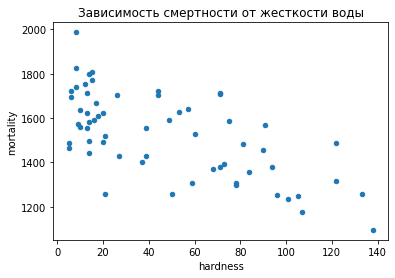

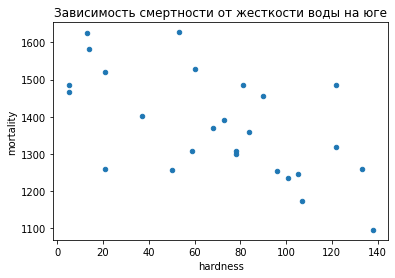

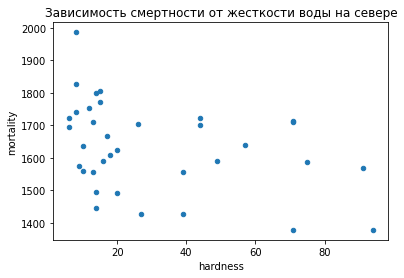

In [42]:
water.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды')
water_south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')
water_north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

Выводы:

1. Для всех городов в целом наблюдается обратная зависимость смертности от жесткости воды.

2. После разбиения на ЮГ и Север эта зависимость значительно снижается(в силу того, что после разделени датасета данных чтановится очень мало), коэффициенты детерминации отрицательные, что очень сильно сказывается на качестве моделей(по сравнению для всех городов), коэффициенты корреляции также снижаются. В целом нельзя сказать, что отдельно по Югу и Северу есть зависимость смертности от жесткости воды. Скорее можно сказать, что жесткость распределена равномерно по Югу, а на Севере наблюдается большое количество городов с низкой жесткостью воды.